In [74]:
import matplotlib.pyplot as plt
import pandas as pd

In [75]:
INSTANCE = "isntance"
DOMAIN = "domain"
HEURISTIC = "heuristic"
PLAN_LENGTH = "plan_length"
PLAN_COST = "plan_cost"
STATES_EXPANDED = "states_expanded"
STATES_EVALUATED = "states_evaluated"
SEARCH_TIME = "search_time"
TOTAL_TIME = "total_time"

ADD = "add"
CG = "cg"

HEURISTICS_DATA_POINTS = {
    "add": "r.",
    "cg" : "b+"
}

df = pd.read_csv("data.csv")

domains = df[DOMAIN].unique()

In [76]:
domains_df = {domain: df.loc[df[DOMAIN] == domain] for domain in domains} 
domains_df_heuristics = { domain: {} for domain in domains }

for domain in domains:
    domain_rows = df.loc[df[DOMAIN] == domain]
    current_domain = domains_df_heuristics[domain]
    for heuristic in HEURISTICS_DATA_POINTS.keys():
        heuristic_data_boolean = domain_rows[HEURISTIC] == heuristic
        current_domain[heuristic] = domain_rows[heuristic_data_boolean]

[]

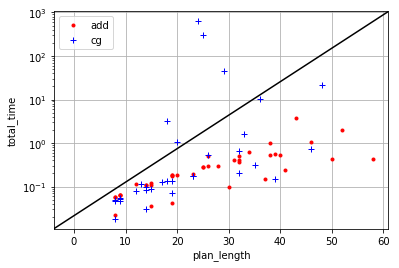

In [77]:
# Change these to see different values on the axis
X_AXIS = PLAN_LENGTH
Y_AXIS = TOTAL_TIME

# Change the domain here
DOMAIN = "freecell"

current_domain = domains_df_heuristics[DOMAIN]

plt.figure()
for heuristic, dp in HEURISTICS_DATA_POINTS.iteritems():
    X1 = current_domain[heuristic][X_AXIS]
    X2 = current_domain[heuristic][Y_AXIS]   
    plt.plot(X1, X2, dp, label=heuristic)
    plt.yscale("log")
    plt.xlabel(X_AXIS)
    plt.ylabel(Y_AXIS)
    plt.grid(True)
    
# Diagonal Line
y_lim = plt.ylim()
x_lim = plt.xlim()
plt.plot(x_lim, y_lim, 'k-')
plt.ylim(y_lim)
plt.xlim(x_lim)

plt.legend(loc="upper left")
plt.plot()

# Use this line to save the plot
if False: plt.savefig(DOMAIN + '.png')